In [ ]:
pip install pytket qiskit python-sat networkx
pip install pytket-qiskit
pip install -U pytket pytket-qiskit

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install --upgrade pytket==2.9.3 pytket-qiskit==0.72.0 qiskit==1.4.2

  Using cached pytket-2.9.3-cp312-abi3-win_amd64.whl.metadata (4.8 kB)
  Using cached qiskit-1.4.2-cp39-abi3-win_amd64.whl.metadata (12 kB)
INFO: pip is looking at multiple versions of pytket-qiskit to determine which version is compatible with other requirements. This could take a while.
  Using cached pytket_qiskit-0.72.0-py3-none-any.whl.metadata (4.9 kB)

The conflict is caused by:
    The user requested qiskit==1.4.2
    pytket-qiskit 0.72.0 depends on qiskit>=2.2.0
    The user requested qiskit==1.4.2
    pytket-qiskit 0.72.0 depends on qiskit>=2.2.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot install pytket-qiskit==0.72.0 and qiskit==1.4.2 because these package versions have conflicting dependencies.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [11]:
pip install --upgrade pytket==2.9.3 pytket-qiskit==0.72.0 qiskit==2.2.0

  Using cached pytket-2.9.3-cp312-abi3-win_amd64.whl.metadata (4.8 kB)
Using cached pytket-2.9.3-cp312-abi3-win_amd64.whl (9.7 MB)
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.7 MB 35.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.7 MB 35.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.7 MB 3.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.7 MB 3.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.7 MB 3.2 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.7 MB 3.7 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.7 MB 3.1 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.7 MB 3.3 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.7 MB 3.5 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.7 MB 3.5 MB/s eta 0:00:01
   -----------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from pytket import Circuit
from pysat.solvers import Glucose3
import networkx as nx

#### defining the circuit

NodeIndices[0, 1, 2, 3, 4, 5]
number of logical qubits: 6
NodeIndices[0, 1, 2, 3, 4, 5]
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]


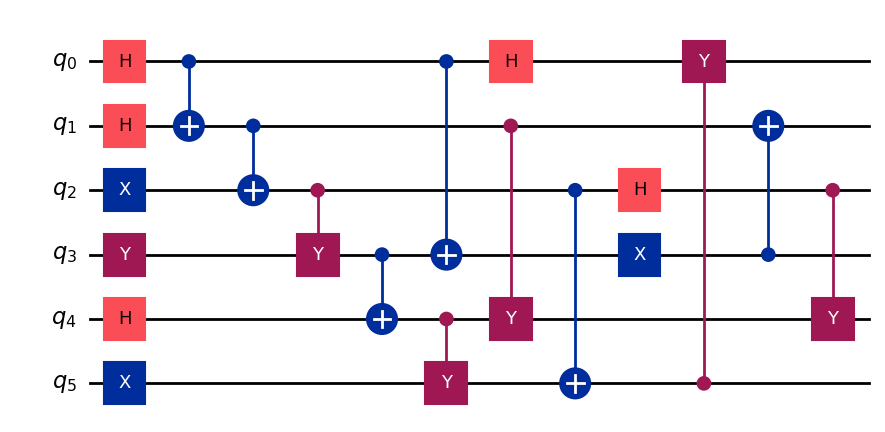

In [9]:
from qiskit import QuantumCircuit
from qiskit.transpiler import CouplingMap


qc = QuantumCircuit(6)

qc.h(0)
qc.h(1)
qc.x(2)
qc.y(3)
qc.h(4)
qc.x(5)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cy(2, 3)
qc.cx(3, 4)
qc.cy(4, 5)
qc.cx(0, 3)
qc.cy(1, 4)
qc.cx(2, 5)
qc.h(0)
qc.h(2)
qc.x(3)
qc.cy(5, 0)
qc.cx(3, 1)
qc.cy(2, 4)

coupling = CouplingMap([[0,1],[1,2],[2,3],[3,4],[4,5]])

V = qc.num_qubits
Physical_qubits = coupling.physical_qubits
physical_layout = coupling
print(coupling.physical_qubits)
print("number of logical qubits:",V)
print(Physical_qubits)
print(physical_layout)
qc.draw('mpl')


#### check if the gate is 2 qubit gate

In [10]:
def is_two_qubit_gate(inst):
    if len(inst.qubits) == 2:
        return True
    else:
        return False 

#### Goal: build these elements:

##### n = number of 2-qubit gates (index gates g1..gn), list G.

##### V = number of logical qubits.

##### P = number of physical qubits.

##### E = [d1..dK] = ordered list of edges of device. Each dk = (p,q); store opmin = min(p,q), opmax = max(p,q).

##### For each gate gi store gi.opmin, gi.opmax (the two logical qubits sorted).

##### Gate dependency list lg: a set of ordered pairs (g_a, g_b) meaning g_b depends on g_a (i.e. g_a occurs earlier on same qubit). You can generate lg by enumerating gates per logical qubit in circuit order

In [11]:
print(qc.data)

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=1>,), clbits=()), CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=2>,), clbits=()), CircuitInstruction(operation=Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=3>,), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=4>,), clbits=()), CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=5>,), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubi

In [6]:
for idx, inst in enumerate(qc.data):
    print(inst)
    print(idx)
    #print(inst.qubits[0])
    #print(qc.qubits.index(inst.qubits[0]))
    #if is_two_qubit_gate(inst):    
        #print(inst.qubits[1])
        #print(qc.qubits.index(inst.qubits[1]))



CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=0>,), clbits=())
0
CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=1>,), clbits=())
1
CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=2>,), clbits=())
2
CircuitInstruction(operation=Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=3>,), clbits=())
3
CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=4>,), clbits=())
4
CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(6, "q"), index=5>,), clbits=())
5
CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(

In [13]:

G_two_qubit = []
L_all = [] 

for idx, inst in enumerate(qc.data):
    q0 = qc.qubits.index(inst.qubits[0])
    gate_data = {'idx': idx}
    
    if is_two_qubit_gate(inst):
        q1 = qc.qubits.index(inst.qubits[1])
        gate_data['qubits'] = [q0, q1]
        G_two_qubit.append({'idx': idx, 'opmin': min(q0, q1), 'opmax': max(q0, q1)})
        
    else:
        gate_data['qubits'] = [q0]
    L_all.append(gate_data)

lg = []

for logical_q in range(V):
    

    gates_on_q = [
        g['idx'] for g in L_all 
        if logical_q in g['qubits']
    ]
    
    for i in range(len(gates_on_q) - 1):
        earlier = gates_on_q[i]
        later = gates_on_q[i + 1]
        lg.append((earlier, later))

for g in L_all:
     print(g)

print(lg)

{'idx': 0, 'qubits': [0]}
{'idx': 1, 'qubits': [1]}
{'idx': 2, 'qubits': [2]}
{'idx': 3, 'qubits': [3]}
{'idx': 4, 'qubits': [4]}
{'idx': 5, 'qubits': [5]}
{'idx': 6, 'qubits': [0, 1]}
{'idx': 7, 'qubits': [1, 2]}
{'idx': 8, 'qubits': [2, 3]}
{'idx': 9, 'qubits': [3, 4]}
{'idx': 10, 'qubits': [4, 5]}
{'idx': 11, 'qubits': [0, 3]}
{'idx': 12, 'qubits': [1, 4]}
{'idx': 13, 'qubits': [2, 5]}
{'idx': 14, 'qubits': [0]}
{'idx': 15, 'qubits': [2]}
{'idx': 16, 'qubits': [3]}
{'idx': 17, 'qubits': [5, 0]}
{'idx': 18, 'qubits': [3, 1]}
{'idx': 19, 'qubits': [2, 4]}
[(0, 6), (6, 11), (11, 14), (14, 17), (1, 6), (6, 7), (7, 12), (12, 18), (2, 7), (7, 8), (8, 13), (13, 15), (15, 19), (3, 8), (8, 9), (9, 11), (11, 16), (16, 18), (4, 9), (9, 10), (10, 12), (12, 19), (5, 10), (10, 13), (13, 17)]


In [15]:
from qiskit import QuantumCircuit
from pytket import Circuit
from math import pi


tk_circ = Circuit(qc.num_qubits)

for instr, qargs, cargs in qc.data:
    name = instr.name.lower()
    qubits = [qc.qubits.index(q) for q in qargs]

        # Single-qubit gates
    if name == "x":
        tk_circ.X(qubits[0])
    elif name == "y":
        tk_circ.Y(qubits[0])
    elif name == "z":
        tk_circ.Z(qubits[0])
    elif name == "h":
        tk_circ.H(qubits[0])
    elif name == "t":
        tk_circ.T(qubits[0])
    elif name == "tdg":
        tk_circ.Tdg(qubits[0])
    elif name == "s":
        tk_circ.S(qubits[0])
    elif name == "sdg":
        tk_circ.Sdg(qubits[0])
    elif name == "rx":
        tk_circ.Rx(float(instr.params[0]), qubits[0])
    elif name == "ry":
        tk_circ.Ry(float(instr.params[0]), qubits[0])
    elif name == "rz":
        tk_circ.Rz(float(instr.params[0]), qubits[0])
    elif name == "u" or name == "u3":
        theta, phi, lam = [float(p) for p in instr.params]
        tk_circ.U3(theta, phi, lam, qubits[0])
    elif name == "u1":
        [lam] = [float(p) for p in instr.params]
        tk_circ.Rz(lam, qubits[0])
    elif name == "u2":
        phi, lam = [float(p) for p in instr.params]
        tk_circ.U2(phi, lam, qubits[0])

        # Two-qubit gates
    elif name == "cx" or name == "cnot":
        tk_circ.CX(qubits[0], qubits[1])
    elif name == "cz":
        tk_circ.CZ(qubits[0], qubits[1])
    elif name == "cy":
        tk_circ.CY(qubits[0], qubits[1])
    elif name == "swap":
        tk_circ.SWAP(qubits[0], qubits[1])

        # Multi-qubit / other gates
    elif name == "ccx":
        tk_circ.CCX(qubits[0], qubits[1], qubits[2])

        # Ignore unsupported gates (like barriers, measurements, resets)
    else:
        print(f"⚠️ Skipping unsupported gate: {name}")




C:\Users\Dell\AppData\Local\Temp\ipykernel_20792\3778606066.py:8: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in qc.data:


#### Setting up Swap count and Transition steps

In [16]:
from pytket.extensions.qiskit import qiskit_to_tk, tk_to_qiskit
from pytket.architecture import Architecture
from pytket.placement import GraphPlacement
from pytket.passes import PlacementPass, RoutingPass




edges = [[0,1],[1,2],[2,3],[3,4],[4,5]]
arch = Architecture(edges)

PlacementPass(GraphPlacement(arch)).apply(tk_circ)
RoutingPass(arch).apply(tk_circ)

S = sum(1 for cmd in tk_circ.get_commands() if cmd.op.type.name == "SWAP")

m = sum(1 for g in qc.data if len(g.qubits) == 2)
T = m + S

print(f"S (SWAP count) = {S}")
print(f"T (layout transitions) = {T}")



S (SWAP count) = 9
T (layout transitions) = 20


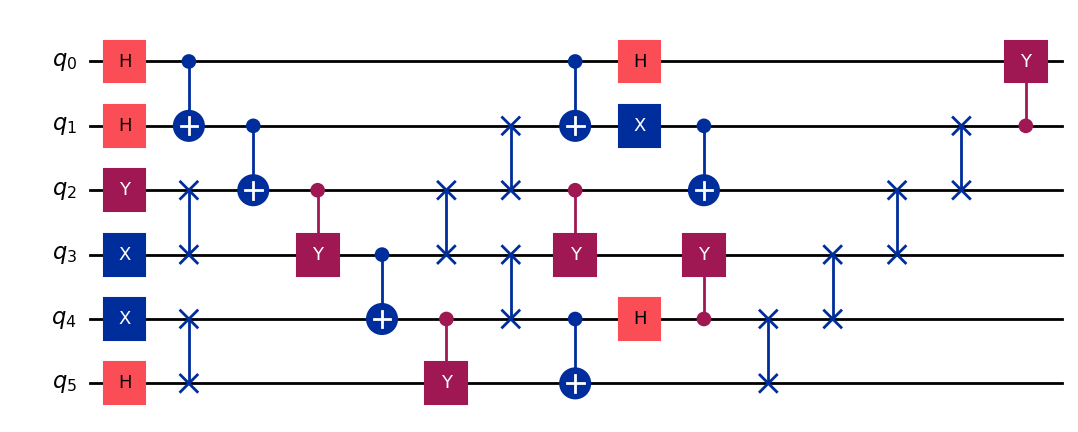

In [17]:
from qiskit import QuantumCircuit
from pytket import Circuit
from math import pi

Mapped_qc = QuantumCircuit(tk_circ.n_qubits)

for op in tk_circ.get_commands():
    name = op.op.get_name().lower()
    qubits = [qb.index for qb in op.args]

        # Single-qubit gates
    if name == "x":
        Mapped_qc.x(qubits[0])
    elif name == "y":
        Mapped_qc.y(qubits[0])
    elif name == "z":
        Mapped_qc.z(qubits[0])
    elif name == "h":
        Mapped_qc.h(qubits[0])
    elif name == "t":
        Mapped_qc.t(qubits[0])
    elif name == "tdg":
        Mapped_qc.tdg(qubits[0])
    elif name == "s":
        Mapped_qc.s(qubits[0])
    elif name == "sdg":
        Mapped_qc.sdg(qubits[0])
    elif name == "rx":
        Mapped_qc.rx(float(op.op.params[0]), qubits[0])
    elif name == "ry":
        Mapped_qc.ry(float(op.op.params[0]), qubits[0])
    elif name == "rz":
        Mapped_qc.rz(float(op.op.params[0]), qubits[0])
    elif name == "u3":
        theta, phi, lam = [float(p) for p in op.op.params]
        Mapped_qc.u3(theta, phi, lam, qubits[0])
    elif name == "u2":
        phi, lam = [float(p) for p in op.op.params]
        Mapped_qc.u2(phi, lam, qubits[0])
    elif name == "u1":
        lam = float(op.op.params[0])
        Mapped_qc.u1(lam, qubits[0])

        # Two-qubit gates
    elif name == "cx" or name == "cnot":
        Mapped_qc.cx(qubits[0], qubits[1])
    elif name == "cz":
        Mapped_qc.cz(qubits[0], qubits[1])
    elif name == "cy":
        Mapped_qc.cy(qubits[0], qubits[1])
    elif name == "swap":
        Mapped_qc.swap(qubits[0], qubits[1])

        # Three-qubit gates
    elif name == "ccx":
        Mapped_qc.ccx(qubits[0], qubits[1], qubits[2])

        # Ignore unsupported gates
    else:
        print(f"⚠️ Skipping unsupported gate: {name}")


Mapped_qc.draw('mpl')


### CNF

In [2]:
from itertools import combinations, count
from pysat.formula import CNF
from pysat.solvers import Glucose3
from pysat.card import CardEnc


logical_qubits = ['a0','a1','a2','a3','a4','a5']
num_logical = len(logical_qubits)

physical_qubits = ['p0','p1','p2','p3','p4','p5']
num_physical = len(physical_qubits)


coupling_edges = [[0,1],[1,2],[2,3],[3,4],[4,5]]


S = 9
T = 10


gates = [
    {"type":"H","qubits":[0]}, {"type":"H","qubits":[1]}, {"type":"X","qubits":[2]},
    {"type":"Y","qubits":[3]}, {"type":"H","qubits":[4]}, {"type":"X","qubits":[5]},
    {"type":"CX","qubits":[0,1]}, {"type":"CX","qubits":[1,2]}, {"type":"CY","qubits":[2,3]},
    {"type":"CX","qubits":[3,4]}, {"type":"CY","qubits":[4,5]}, {"type":"CX","qubits":[0,3]},
    {"type":"CY","qubits":[1,4]}, {"type":"CX","qubits":[2,5]}, {"type":"H","qubits":[0]},
    {"type":"H","qubits":[2]}, {"type":"X","qubits":[3]}, {"type":"CY","qubits":[5,0]},
    {"type":"CX","qubits":[3,1]}, {"type":"CY","qubits":[2,4]}
]
num_gates = len(gates)


dependencies = {
    6: [0,1], 7: [6,2], 8: [7,3], 9: [8,4], 10: [9,5],
    11: [0,8], 12: [6,9], 13: [7,10], 14: [11], 15: [13],
    16: [11], 17: [10,14], 18: [16,12], 19: [15,12]
}

def is_two_qubit_gate(gate_dict):
    return len(gate_dict["qubits"]) == 2


var_counter = count(1)

o_vars = {}   
for t in range(T+1):
    for i in range(num_gates):
        o_vars[(t,i)] = next(var_counter)

pi_vars = {} 
for t in range(T+1):
    for a in range(num_logical):
        for p in range(num_physical):
            pi_vars[(t,a,p)] = next(var_counter)

c_vars = {}   
for t in range(1,T+1):
    for k in range(len(coupling_edges)):
        c_vars[(t,k)] = next(var_counter)


clauses = []
print("Generating clauses with corrected cumulative logic...")


for i in range(num_gates):
    
    clauses.append([o_vars[(T,i)]]) 
    
    for t in range(T):
        # Clause: (NOT o_t,i OR o_t+1,i)
        clauses.append([-o_vars[(t,i)], o_vars[(t+1,i)]])


for j, deps in dependencies.items():
    for i in deps:
        for t in range(T + 1):
            # Clause: (NOT o_t,j OR o_t,i)
            clauses.append([-o_vars[(t,j)], o_vars[(t,i)]])


for t in range(T+1):
    
    for a in range(num_logical):
        clauses.append([pi_vars[(t,a,p)] for p in range(num_physical)])
        for p1, p2 in combinations(range(num_physical), 2):
            clauses.append([-pi_vars[(t,a,p1)], -pi_vars[(t,a,p2)]])
    for p in range(num_physical):
        for a1, a2 in combinations(range(num_logical), 2):
            clauses.append([-pi_vars[(t,a1,p)], -pi_vars[(t,a2,p)]])

for a in range(num_logical):
    clauses.append([pi_vars[(0,a,a)]])
    for p in range(num_physical):
        if p != a:
            clauses.append([-pi_vars[(0,a,p)]])


adjacent_pairs = []
for p1, p2 in coupling_edges:
    adjacent_pairs.append((p1, p2))
    adjacent_pairs.append((p2, p1))

for t in range(T+1):
    for i, gate in enumerate(gates):
        if len(gate["qubits"]) != 2:
            continue
        q1, q2 = gate["qubits"]
        for p1, p2 in adjacent_pairs:
            if abs(p1 - p2) <= 2:
                
                clauses.append([-o_vars[(t,i)], -pi_vars[(t,q1,p1)], pi_vars[(t,q2,p2)]])
                clauses.append([-o_vars[(t,i)], -pi_vars[(t,q2,p2)], pi_vars[(t,q1,p1)]])


for t in range(1, T+1):
    for k, (p1, p2) in enumerate(coupling_edges):
        for a in range(num_logical):
            clauses.append([-c_vars[(t,k)], -pi_vars[(t-1,a,p1)], pi_vars[(t,a,p2)]])
            clauses.append([-c_vars[(t,k)], -pi_vars[(t-1,a,p2)], pi_vars[(t,a,p1)]])

for t in range(1, T+1):
    for k1, k2 in combinations(range(len(coupling_edges)), 2):
        e1 = set(coupling_edges[k1])
        e2 = set(coupling_edges[k2])
        if e1 & e2:
            clauses.append([-c_vars[(t,k1)], -c_vars[(t,k2)]])

all_swaps = list(c_vars.values())
if all_swaps:
    cnf_card = CardEnc.atmost(lits=all_swaps, bound=S, encoding=1)
    clauses += cnf_card.clauses

for t in range(1, T+1):
    for a in range(num_logical):
        for p in range(num_physical):
            possible_swaps = []
            for k, (p1, p2) in enumerate(coupling_edges):
                if p == p1:
                    possible_swaps.append((k, p2))
                elif p == p2:
                    possible_swaps.append((k, p1))
            if possible_swaps:
                for p_new in range(num_physical):
                    if p_new != p:
                        clause = [-pi_vars[(t-1,a,p)], -pi_vars[(t,a,p_new)]]
                        for k, _ in possible_swaps:
                            clause.append(c_vars[(t,k)])
                        clauses.append(clause)

num_vars = next(var_counter) - 1
num_clauses = len(clauses)
print(f"\nCNF: {num_vars} vars, {num_clauses} clauses")

# Write CNF file
with open("quantum_circuit.cnf", "w") as f:
    f.write(f"p cnf {num_vars} {num_clauses}\n")
    for clause in clauses:
        f.write(" ".join(map(str, clause)) + " 0\n")


Generating clauses with corrected cumulative logic...

CNF: 666 vars, 8207 clauses


### Incremental and parallel pysat